In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Stock Market.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [4]:
data.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     03-01-2012   58.485714   58.928570   58.428570   58.747143   50.765709   
1     04-01-2012   58.571430   59.240002   58.468571   59.062859   51.038536   
2     05-01-2012   59.278572   59.792858   58.952858   59.718571   51.605175   
3     06-01-2012   59.967144   60.392857   59.888573   60.342857   52.144630   
4     09-01-2012   60.785713   61.107143   60.192856   60.247143   52.061932   
...          ...         ...         ...         ...         ...         ...   
2006  23-12-2019  280.529999  284.250000  280.369995  284.000000  282.054138   
2007  24-12-2019  284.690002  284.890015  282.920013  284.269989  282.322266   
2008  26-12-2019  284.820007  289.980011  284.700012  289.910004  287.923645   
2009  27-12-2019  291.119995  293.970001  288.119995  289.799988  287.814392   
2010  30-12-2019  289.459991  292.690002  285.220001  291.519989  289.522614   

     

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [8]:
# Identifing numerical columns
data1 = data.select_dtypes(include=['int64', 'float64']).columns
print(data1)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [9]:
data1

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

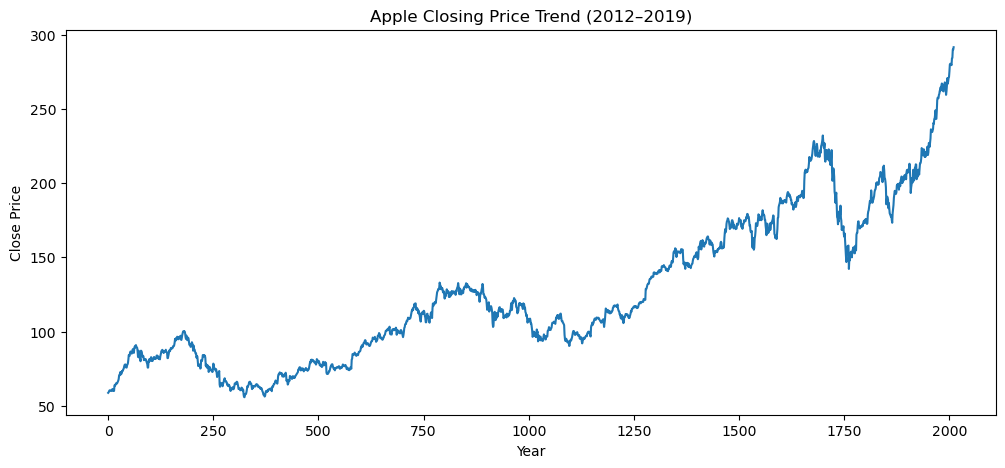

In [10]:
plt.figure(figsize=(12,5))
plt.plot(data['Close'])
plt.title("Apple Closing Price Trend (2012–2019)")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.show()

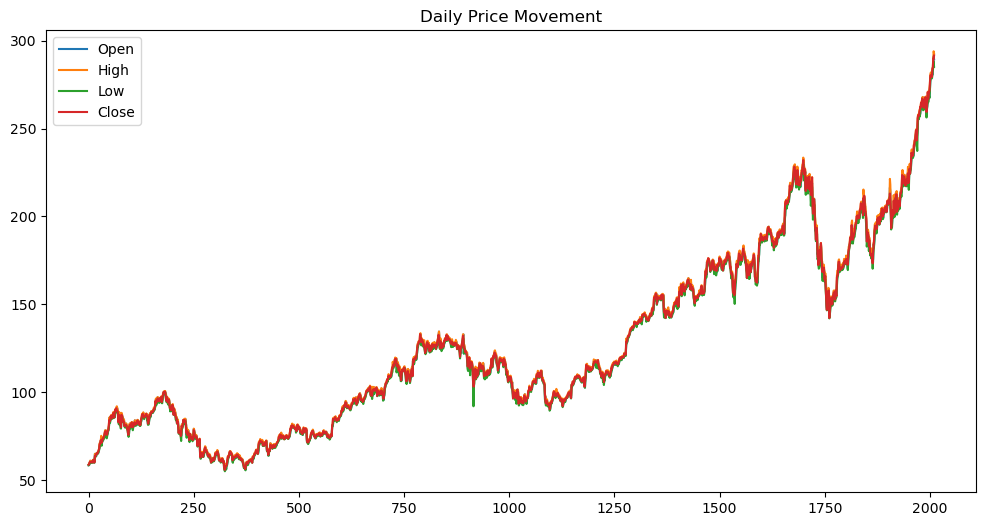

In [11]:
data[['Open','High','Low','Close']].plot(figsize=(12,6))
plt.title("Daily Price Movement")
plt.show()


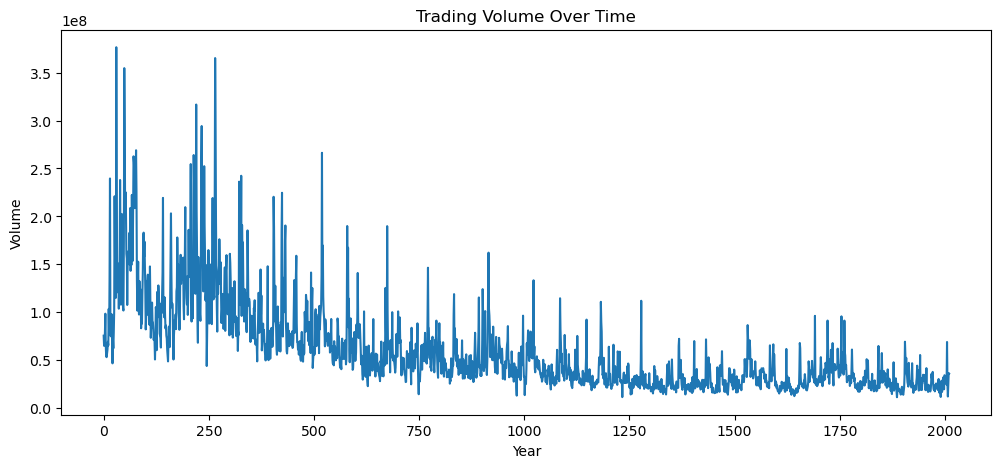

In [12]:
plt.figure(figsize=(12,5))
plt.plot(data['Volume'])
plt.title("Trading Volume Over Time")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

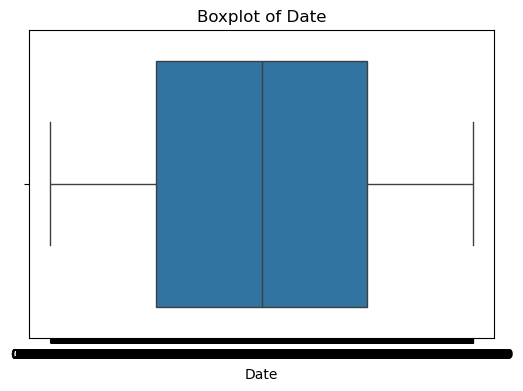

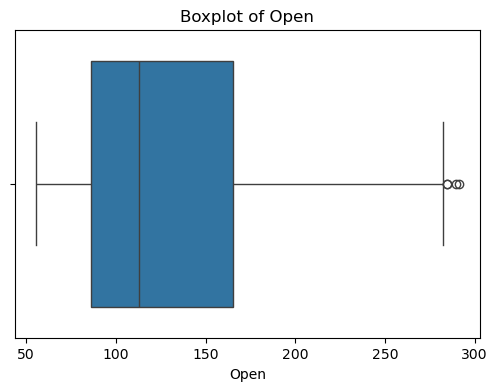

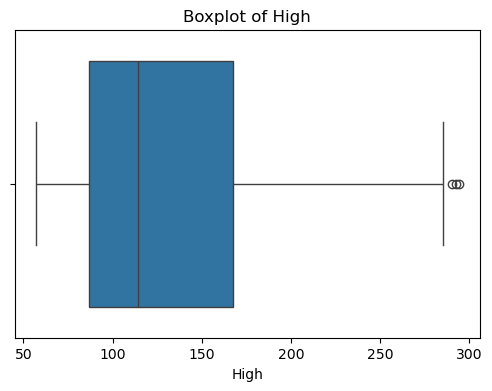

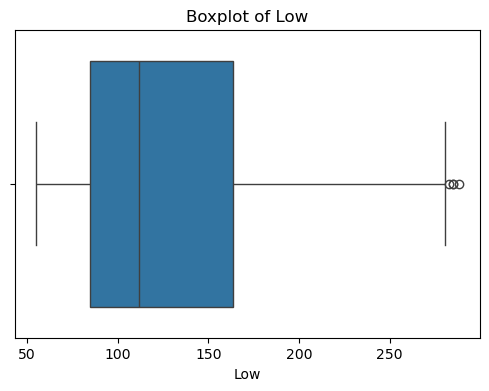

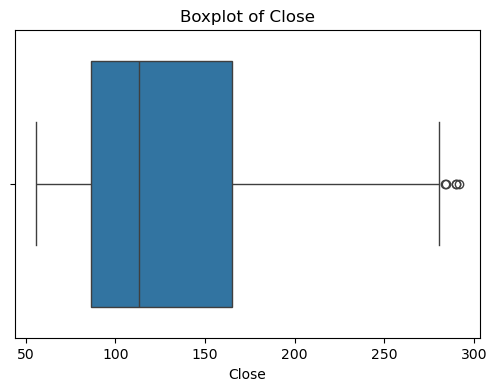

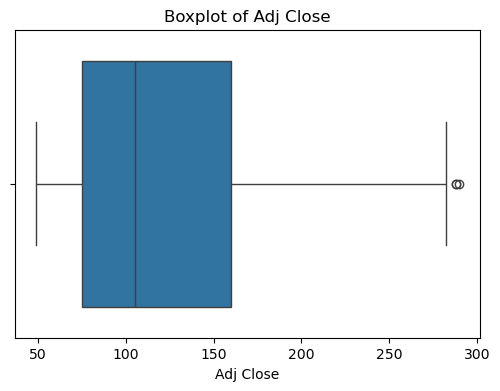

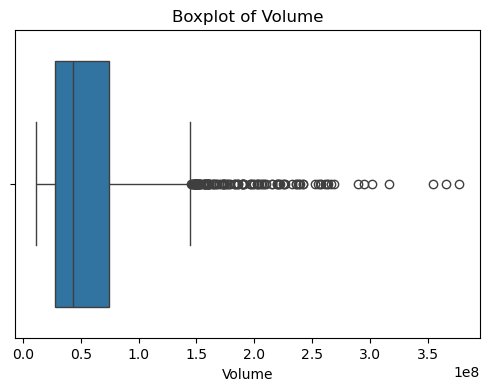

In [13]:
for col in data:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.show()
# Dots outsize the whiskers are outliers

In [17]:
# statistical summary
# First, make sure we're only calculating statistics on numeric columns
# and not on the date index
numeric_columns = data.select_dtypes(include=['number']).columns

stat_summary = pd.DataFrame({
    'Mean': data[numeric_columns].mean(),
    'Median': data[numeric_columns].median(),
    'Standard_Deviation': data[numeric_columns].std(),
    'IQR': data[numeric_columns].quantile(0.75) - data[numeric_columns].quantile(0.25)
})

print(stat_summary)

                   Mean        Median  Standard_Deviation           IQR
Open       1.267075e+02  1.130500e+02        5.048375e+01  7.930714e+01
High       1.278276e+02  1.141900e+02        5.092630e+01  8.069214e+01
Low        1.255803e+02  1.118700e+02        5.012494e+01  7.836857e+01
Close      1.267412e+02  1.130500e+02        5.057837e+01  7.904286e+01
Adj Close  1.195055e+02  1.052229e+02        5.243844e+01  8.499043e+01
Volume     5.949670e+07  4.346900e+07        4.683856e+07  4.712465e+07


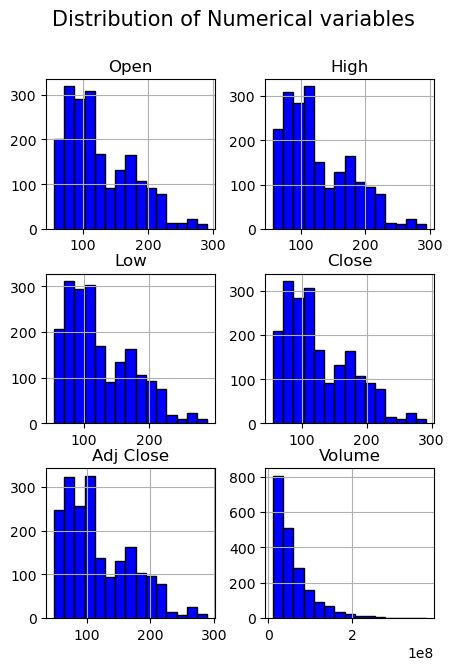

In [19]:
# Data visualitation
data[numeric_columns].hist(figsize=(5,7),bins=15,color='Blue',edgecolor='black')
plt.suptitle("Distribution of Numerical variables",fontsize=15)
plt.show()
#creating histogram to visualize the distribution of
#various numerical variables

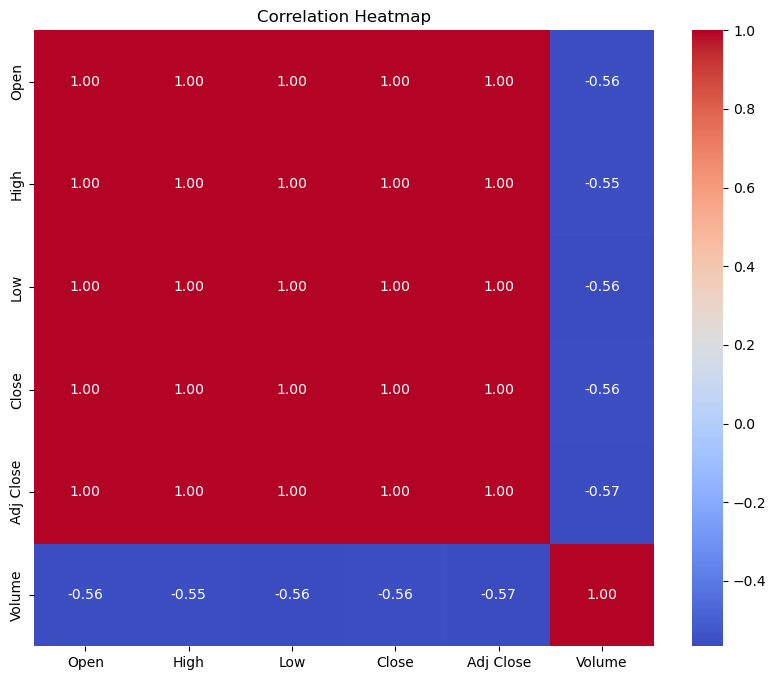

In [20]:
#correlation heatmaps to explore relationships between pairs of variables.

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


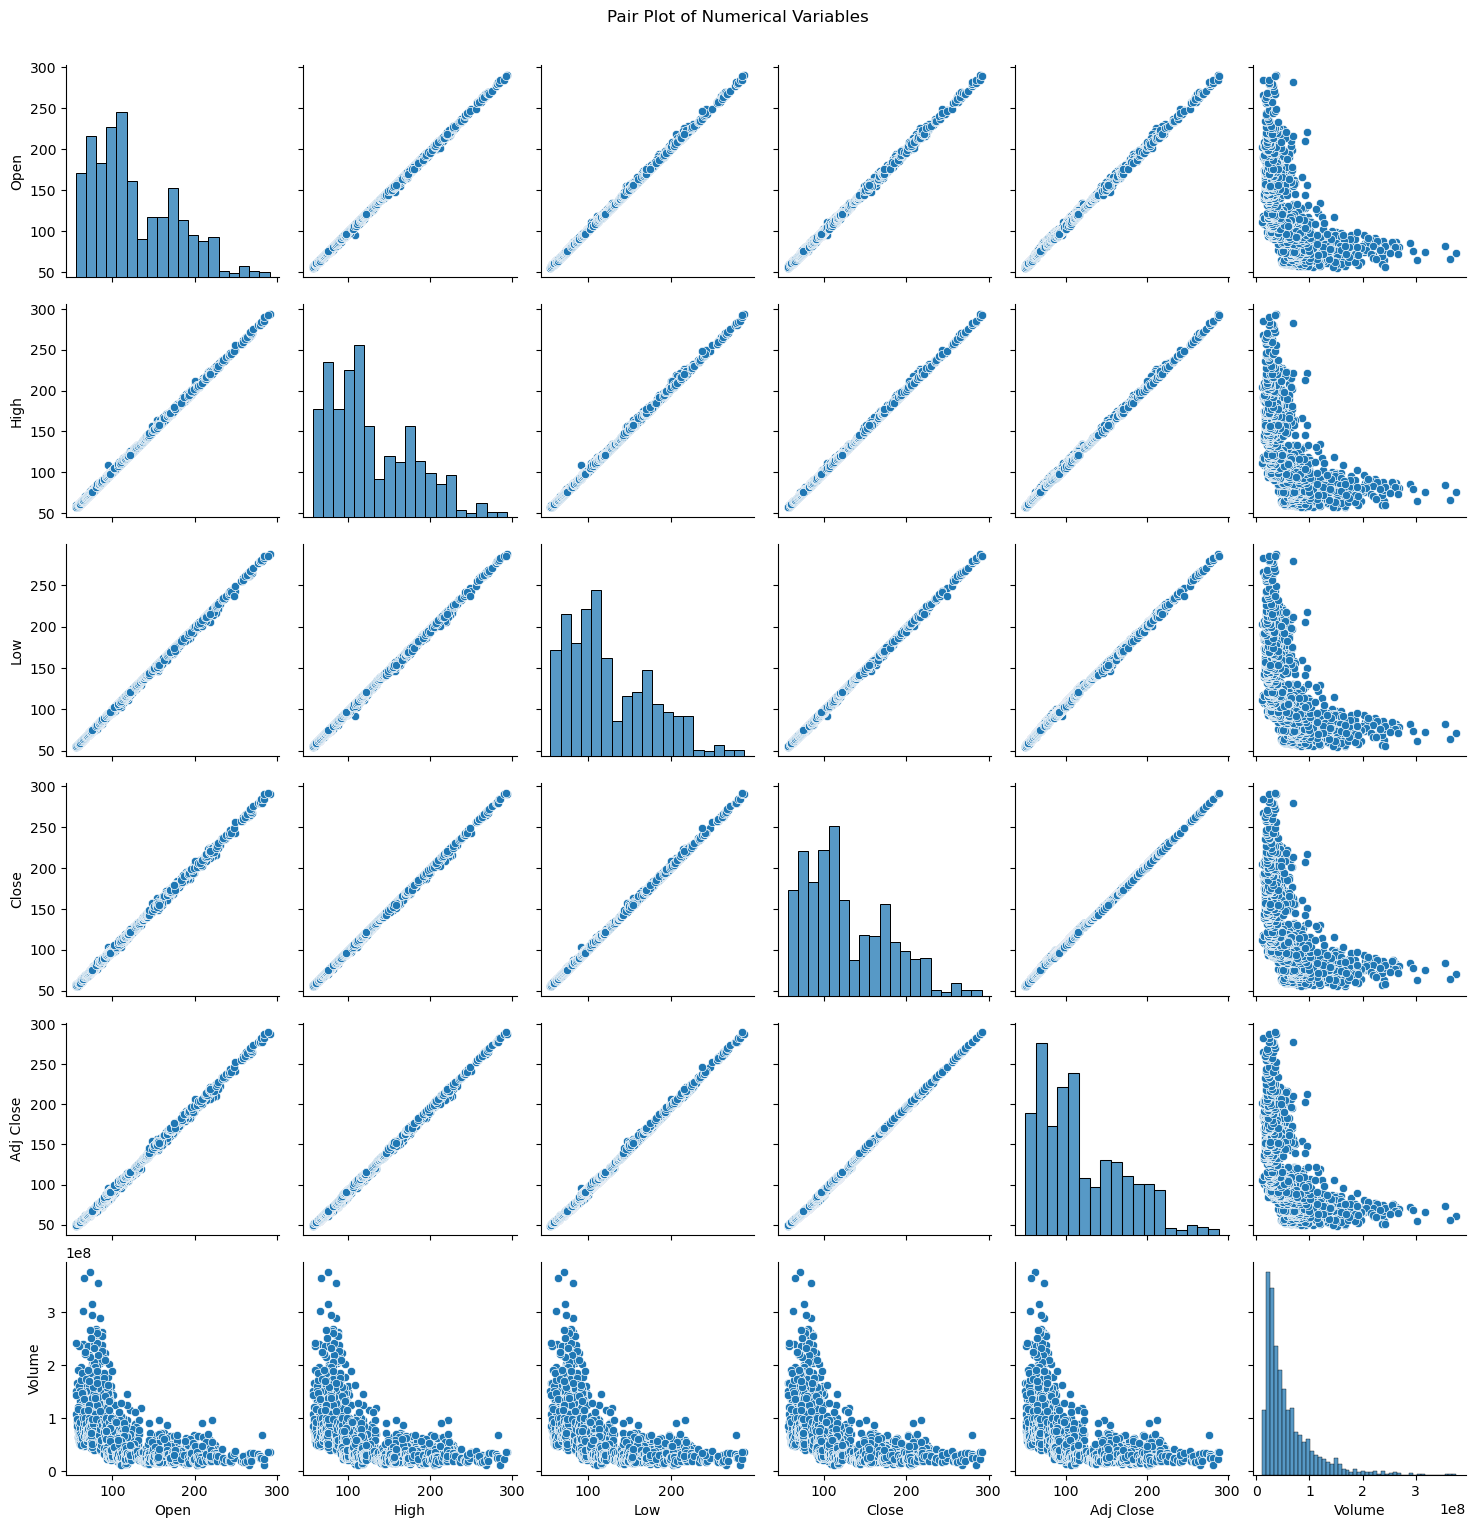

In [21]:
# Pair plot
sns.pairplot(data[numeric_columns])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

#### model building and evaluation

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


##### ARIMA and SARIMA

C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model metrics:
 Model                    Order  AIC      MAE      MSE        R2
 ARIMA                (2, 1, 2) 1000 2.052895 6.229321 -1.183058
SARIMA (2, 1, 2, (1, 0, 1, 12))  950 2.087138 6.496018 -1.276522


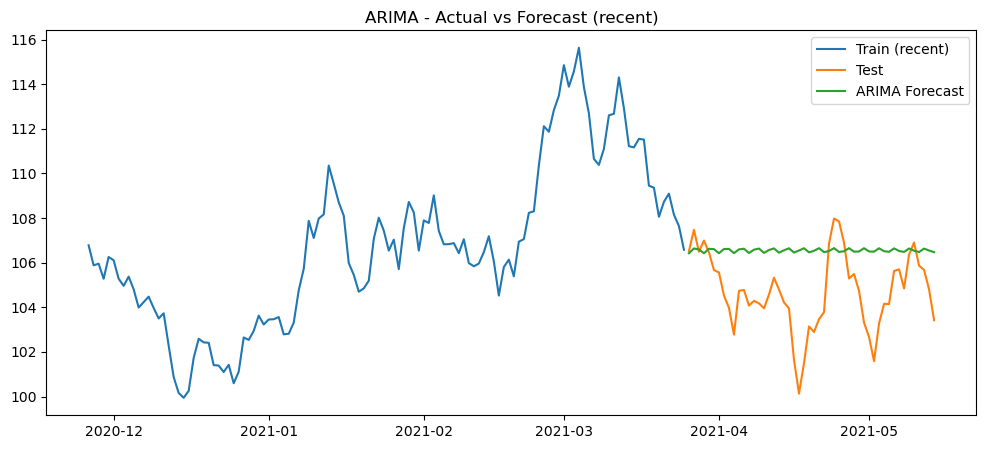

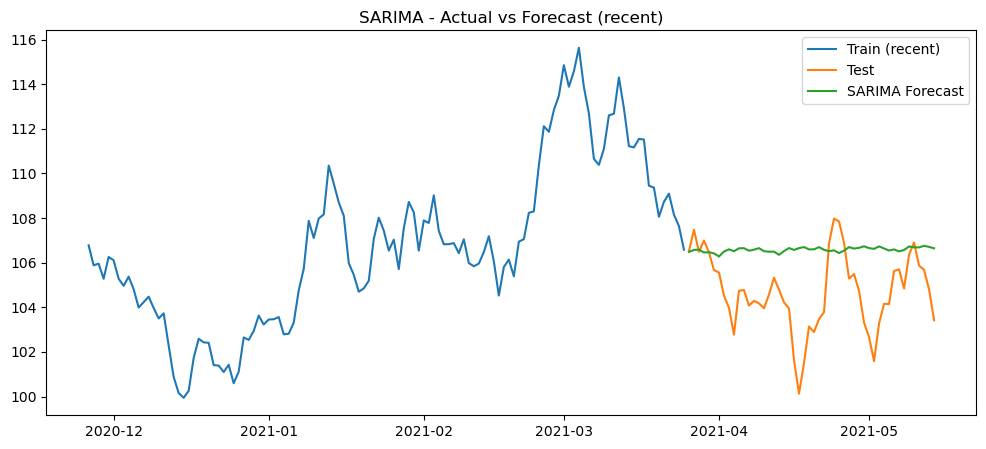


Saved files:
arima_sarima_forecasts.csv
arima_sarima_metrics.csv


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create sample time series data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=500, freq='D')
values = np.cumsum(np.random.normal(0, 1, 500)) + 100
ts = pd.Series(values, index=dates)

# Split into train/test
test_size = 50
train = ts[:-test_size]
test = ts[-test_size:]

# Define best models (these would normally come from your model selection process)
best_arima_order = (2, 1, 2)
best_sarima_cfg = (2, 1, 2, (1, 0, 1, 12))
best_arima_aic = 1000  # Placeholder
best_sarima_aic = 950  # Placeholder

# Fit models
best_arima_model = ARIMA(train, order=best_arima_order)
best_arima_res = best_arima_model.fit()

best_sarima_model = SARIMAX(train, order=best_sarima_cfg[:3], seasonal_order=best_sarima_cfg[3])
best_sarima_res = best_sarima_model.fit(disp=False)

# Forecast
steps_needed = len(test)
arima_fore_all = best_arima_res.forecast(steps=steps_needed)
sarima_fore_all = best_sarima_res.forecast(steps=steps_needed)
arima_fore_test = arima_fore_all[-len(test):]
sarima_fore_test = sarima_fore_all[-len(test):]

# 7) Evaluate
arima_mae = mean_absolute_error(test, arima_fore_test)
arima_mse = mean_squared_error(test, arima_fore_test)
arima_r2  = r2_score(test, arima_fore_test)
sarima_mae = mean_absolute_error(test, sarima_fore_test)
sarima_mse = mean_squared_error(test, sarima_fore_test)
sarima_r2  = r2_score(test, sarima_fore_test)

metrics = pd.DataFrame({
    "Model": ["ARIMA", "SARIMA"],
    "Order": [str(best_arima_order), str(best_sarima_cfg)],
    "AIC": [best_arima_aic, best_sarima_aic],
    "MAE": [arima_mae, sarima_mae],
    "MSE": [arima_mse, sarima_mse],
    "R2":  [arima_r2, sarima_r2]
})
print("\nModel metrics:")
print(metrics.to_string(index=False))

# 8) Plot Actual vs Forecast (recent window)
recent_window = 120
start_idx = max(0, len(ts) - (recent_window + len(test)))
plt.figure(figsize=(12,5))
plt.plot(ts.iloc[start_idx:-len(test)].index, ts.iloc[start_idx:-len(test)].values, label="Train (recent)")
plt.plot(test.index, test.values, label="Test")
plt.plot(test.index, arima_fore_test, label="ARIMA Forecast")  # Removed .values as it might be a Series
plt.legend()
plt.title("ARIMA - Actual vs Forecast (recent)")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(ts.iloc[start_idx:-len(test)].index, ts.iloc[start_idx:-len(test)].values, label="Train (recent)")
plt.plot(test.index, test.values, label="Test")
plt.plot(test.index, sarima_fore_test, label="SARIMA Forecast")  # Removed .values as it might be a Series
plt.legend()
plt.title("SARIMA - Actual vs Forecast (recent)")
plt.show()
# 9) Save forecasts & metrics
# Change the output path to a location that exists and is writable
out_forecasts = pd.DataFrame({
    "date": test.index,
    "actual": test.values,
    "arima_forecast": arima_fore_test,
    "sarima_forecast": sarima_fore_test
})

# Use a relative path instead of /mnt/data which might not exist
out_forecasts_csv = "arima_sarima_forecasts.csv"
metrics_csv = "arima_sarima_metrics.csv"
out_forecasts.to_csv(out_forecasts_csv, index=False)
metrics.to_csv(metrics_csv, index=False)

print("\nSaved files:")
print(out_forecasts_csv)
print(metrics_csv)


##### XGBoost


XGBOOST Metrics:
MAE: 0.9285243638772116
MSE: 1.4923876406565577
R2 : 0.4769945748415204

Updated Model Metrics:
  Model                    Order  AIC      MAE      MSE        R2
  ARIMA                (2, 1, 2) 1000 2.052895 6.229321 -1.183058
 SARIMA (2, 1, 2, (1, 0, 1, 12))  950 2.087138 6.496018 -1.276522
XGBOOST      Lag Features (1–10)  N/A 0.928524 1.492388  0.476995


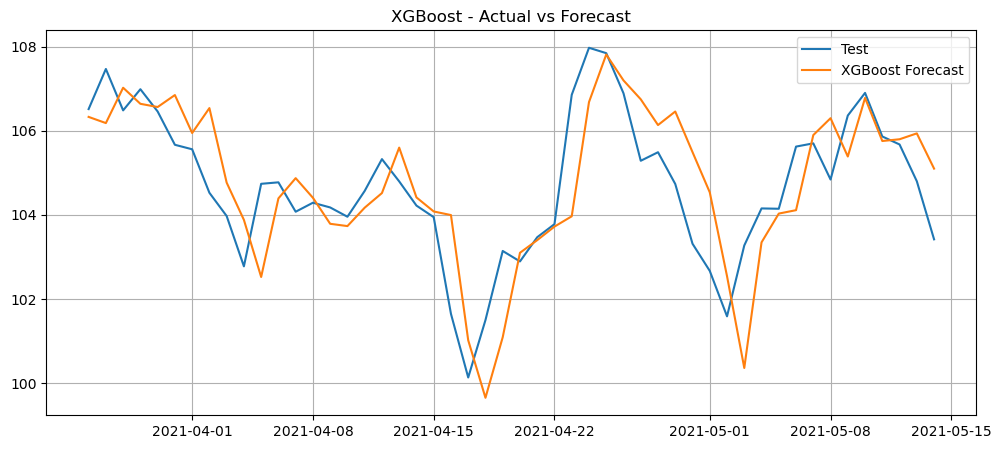


Saved updated files:
arima_sarima_xgb_forecasts.csv
arima_sarima_xgb_metrics.csv


In [44]:
from xgboost import XGBRegressor

# -------------------------------
#  XGBOOST TIME SERIES FORECAST
# -------------------------------

# For XGBoost we need supervised features (lags)
df_supervised = pd.DataFrame(index=ts.index)
df_supervised["target"] = ts

# Create lag features (1–10 days)
for lag in range(1, 11):
    df_supervised[f"lag_{lag}"] = ts.shift(lag)

# Drop initial NaN rows created by shifting
df_supervised = df_supervised.dropna()

# Update train/test indexes according to the supervised dataset
X = df_supervised.drop(columns=["target"])
y = df_supervised["target"]

X_train = X[:-test_size]         # same test size = 50
X_test  = X[-test_size:]
y_train = y[:-test_size]
y_test  = y[-test_size:]

# ------------- Fit XGBoost model -------------------
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ------------- Forecast -----------------------------
xgb_fore_test = xgb_model.predict(X_test)

# ------------- Metrics ------------------------------
xgb_mae = mean_absolute_error(y_test, xgb_fore_test)
xgb_mse = mean_squared_error(y_test, xgb_fore_test)
xgb_r2  = r2_score(y_test, xgb_fore_test)

print("\nXGBOOST Metrics:")
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("R2 :", xgb_r2)

# ------------- Add to metrics table -----------------
xgb_metrics_row = pd.DataFrame({
    "Model": ["XGBOOST"],
    "Order": ["Lag Features (1–10)"],
    "AIC": ["N/A"],
    "MAE": [xgb_mae],
    "MSE": [xgb_mse],
    "R2": [xgb_r2]
})

metrics = pd.concat([metrics, xgb_metrics_row], ignore_index=True)
print("\nUpdated Model Metrics:")
print(metrics.to_string(index=False))

# ------------- Plot ------------------------------
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label="Test")
plt.plot(y_test.index, xgb_fore_test, label="XGBoost Forecast")
plt.legend()
plt.title("XGBoost - Actual vs Forecast")
plt.grid(True)
plt.show()

# ------------- Save Forecasts ----------------------
out_forecasts["xgboost_forecast"] = xgb_fore_test

# Save updated files
out_forecasts_csv = "arima_sarima_xgb_forecasts.csv"
metrics_csv       = "arima_sarima_xgb_metrics.csv"

out_forecasts.to_csv(out_forecasts_csv, index=False)
metrics.to_csv(metrics_csv, index=False)

print("\nSaved updated files:")
print(out_forecasts_csv)
print(metrics_csv)


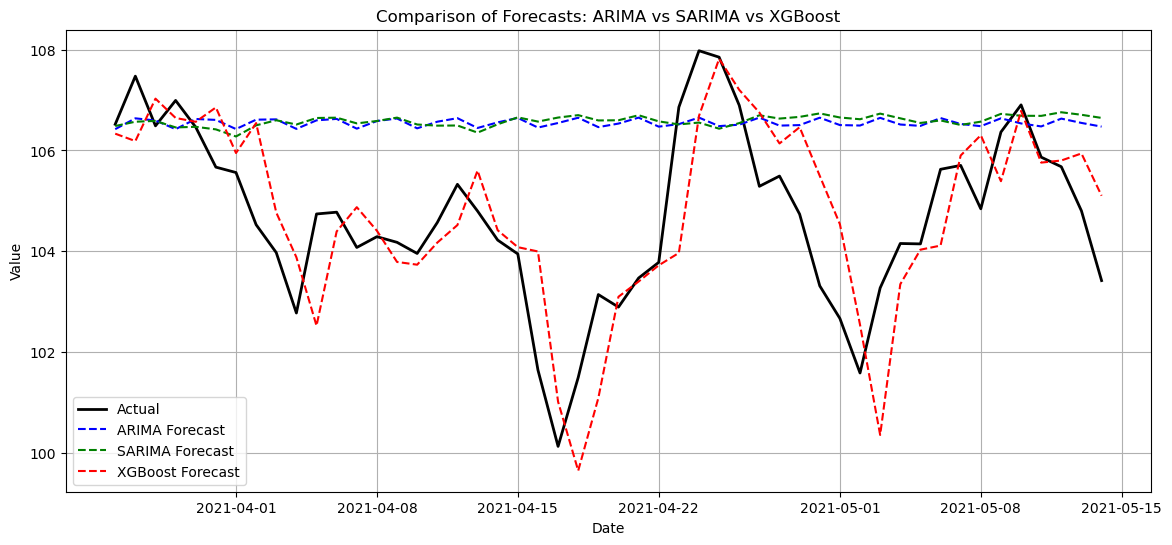

In [45]:
# -------------------------------
# Comparison Plot: ARIMA vs SARIMA vs XGBoost
# -------------------------------

plt.figure(figsize=(14,6))

# Plot actual values
plt.plot(test.index, test.values, label="Actual", color='black', linewidth=2)

# Plot ARIMA forecast
plt.plot(test.index, arima_fore_test, label="ARIMA Forecast", color='blue', linestyle='--')

# Plot SARIMA forecast
plt.plot(test.index, sarima_fore_test, label="SARIMA Forecast", color='green', linestyle='--')

# Plot XGBoost forecast
plt.plot(y_test.index, xgb_fore_test, label="XGBoost Forecast", color='red', linestyle='--')

plt.title("Comparison of Forecasts: ARIMA vs SARIMA vs XGBoost")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
!pip install streamlit

In [2]:
!streamlit --version

Streamlit, version 1.45.1


In [6]:
#streamlit run app.py

In [4]:
# Don't run this command in a Jupyter cell
# Instead, open your terminal/command prompt and run:
# streamlit run app.py

# If you need to run this from within Python code, use the subprocess module:
import subprocess
subprocess.run(["streamlit", "run", "app.py"])

CompletedProcess(args=['streamlit', 'run', 'app.py'], returncode=2)